In [1]:
from manim import *
config.media_embed = True

Manim Community v0.18.0

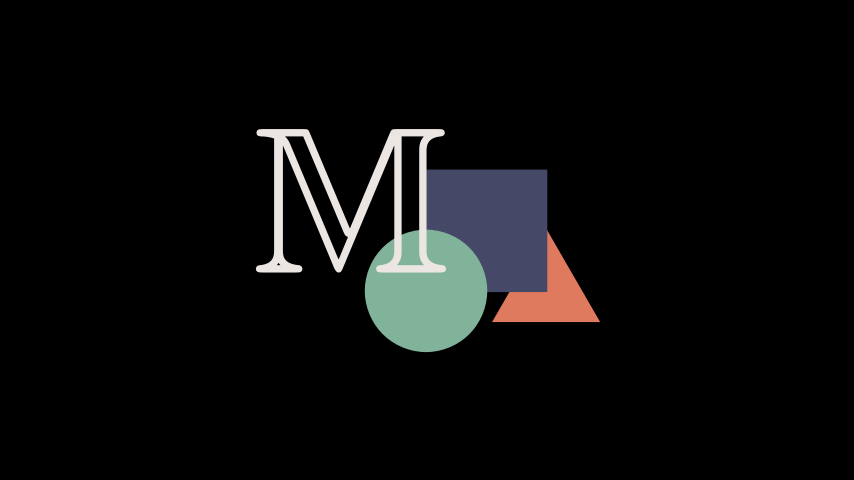

In [2]:
%%manim -v WARNING  --progress_bar None -s -ql --disable_caching MyExample
class MyExample(Scene):
    def construct(self):
        m= ManimBanner()
        self.add(m)

In [4]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching StephenStrogatzQuote

class StephenStrogatzQuote(Scene):
    def construct(self):
        text = Text("In mathematics, our freedom lies in the questions we ask — and in how we pursue them — but not in the answers awaiting us", font_size=48, color=WHITE)
        self.play(Write(text))
        self.wait(2)

In [6]:
%%manim -v WARNING  --progress_bar None -ql --disable_caching StephenStrogatzQuote


class FormulasAreLies(PiCreatureScene):
    def construct(self):
        you = self.pi_creature
        t2c = {
            "{L}": BLUE,
            "{g}": YELLOW,
            "\\theta_0": WHITE,
            "\\sqrt{\\,": WHITE,
        }
        kwargs = {"tex_to_color_map": t2c}
        period_eq = OldTex(
            "\\text{Period} = 2\\pi \\sqrt{\\,{L} / {g}}",
            **kwargs
        )
        theta_eq = OldTex(
            "\\theta(t) = \\theta_0 \\cos\\left("
            "\\sqrt{\\,{L} / {g}} \\cdot t"
            "\\right)",
            **kwargs
        )
        equations = VGroup(theta_eq, period_eq)
        equations.arrange(DOWN, buff=LARGE_BUFF)

        for eq in period_eq, theta_eq:
            i = eq.index_of_part_by_tex("\\sqrt")
            eq.sqrt_part = eq[i:i + 4]

        theta0 = theta_eq.get_part_by_tex("\\theta_0")
        theta0_words = OldTexText("Starting angle")
        theta0_words.next_to(theta0, UL)
        theta0_words.shift(UP + 0.5 * RIGHT)
        arrow = Arrow(
            theta0_words.get_bottom(),
            theta0,
            color=WHITE,
            tip_length=0.25,
        )

        bubble = SpeechBubble()
        bubble.pin_to(you)
        bubble.write("Lies!")
        bubble.content.scale(2)
        bubble.resize_to_content()

        self.add(period_eq)
        you.change("pondering", period_eq)
        self.wait()
        theta_eq.remove(*theta_eq.sqrt_part)
        self.play(
            TransformFromCopy(
                period_eq.sqrt_part,
                theta_eq.sqrt_part,
            ),
            FadeIn(theta_eq)
        )
        theta_eq.add(*theta_eq.sqrt_part)
        self.play(
            FadeIn(theta0_words, LEFT),
            GrowArrow(arrow),
        )
        self.wait()
        self.play(you.change, "confused")
        self.wait()
        self.play(
            you.change, "angry",
            ShowCreation(bubble),
            FadeInFromPoint(bubble.content, you.mouth),
            equations.to_edge, LEFT,
            FadeOut(arrow),
            FadeOut(theta0_words),
        )
        self.wait()

    def create_pi_creature(self):
        return You().flip().to_corner(DR)


# class TourOfDifferentialEquations(Scene):
#     def construct(self):
#         pass



NameError: name 'PiCreatureScene' is not defined